# Import Libraries

In [173]:
# Import our libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import from sklearn.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# PCA
from sklearn.decomposition import PCA


# Helper Functions

In [174]:
def quick_look(x):
    print(data[x].value_counts())
    print(f'\nMissing Values: {data[x].isna().sum()}')

# Import Data

In [175]:
data = pd.read_csv('./datasets/cleaned_data/shelters_with_stats.csv')

In [176]:
data.head()

,id,name,date_in,location,intake_type,condition,age_in,breed,color,date_out,...,breed_2,pure,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,time_in_shelter
0,A047759,Oreo,2014-04-02 15:55:00,Austin (TX),surrender,normal,10.0,dachshund,Tricolor,2014-04-07 15:12:00,...,dachshund,1.0,0.500,26.0,40.0,7.000000,10.000000,16.000000,32.000000,4 days 23:17:00
1,A134067,Bandit,2013-11-16 09:02:00,12034 Research Blvd in Austin (TX),public_assist,injured,16.0,shetland sheepdog,Brown/White,2013-11-16 11:54:00,...,shetland sheepdog,1.0,0.950,1.0,4.0,17.941176,20.908497,42.934641,57.522876,0 days 02:52:00
2,A141142,Bettie,2013-11-16 14:46:00,Austin (TX),stray,aged,15.0,labrador retriever/pit bull,Black/White,2013-11-17 11:40:00,...,pit bull,0.0,0.825,8.5,14.5,19.000000,21.500000,47.500000,65.000000,0 days 20:54:00
3,A163459,Sasha,2014-11-14 15:11:00,Ih 35 And 41St St in Austin (TX),stray,normal,15.0,miniature schnauzer,Black/Gray,2014-11-14 19:28:00,...,miniature schnauzer,1.0,0.850,5.0,15.0,17.941176,20.908497,42.934641,57.522876,0 days 04:17:00
4,A165752,Pep,2014-09-15 11:28:00,Gatlin Gun Rd And Brodie in Austin (TX),stray,normal,15.0,lhasa apso,Brown/White,2014-09-15 16:35:00,...,lhasa apso,1.0,0.300,41.0,80.0,17.941176,20.908497,42.934641,57.522876,0 days 05:07:00


In [177]:
data.dropna(inplace=True)

In [178]:
data.columns

Index(['id', 'name', 'date_in', 'location', 'intake_type', 'condition',
       'age_in', 'breed', 'color', 'date_out', 'dob', 'outcome', 'age_out',
       'sex', 'intact_in', 'intact_out', 'age', 'primary_color',
       'secondary_color', 'breed_1', 'breed_2', 'pure', 'obey', 'reps_lower',
       'reps_upper', 'height_low_inches', 'height_high_inches',
       'weight_low_lbs', 'weight_high_lbs', 'time_in_shelter'],
      dtype='object')

In [179]:
data.head()

,id,name,date_in,location,intake_type,condition,age_in,breed,color,date_out,...,breed_2,pure,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,time_in_shelter
0,A047759,Oreo,2014-04-02 15:55:00,Austin (TX),surrender,normal,10.0,dachshund,Tricolor,2014-04-07 15:12:00,...,dachshund,1.0,0.500,26.0,40.0,7.000000,10.000000,16.000000,32.000000,4 days 23:17:00
1,A134067,Bandit,2013-11-16 09:02:00,12034 Research Blvd in Austin (TX),public_assist,injured,16.0,shetland sheepdog,Brown/White,2013-11-16 11:54:00,...,shetland sheepdog,1.0,0.950,1.0,4.0,17.941176,20.908497,42.934641,57.522876,0 days 02:52:00
2,A141142,Bettie,2013-11-16 14:46:00,Austin (TX),stray,aged,15.0,labrador retriever/pit bull,Black/White,2013-11-17 11:40:00,...,pit bull,0.0,0.825,8.5,14.5,19.000000,21.500000,47.500000,65.000000,0 days 20:54:00
3,A163459,Sasha,2014-11-14 15:11:00,Ih 35 And 41St St in Austin (TX),stray,normal,15.0,miniature schnauzer,Black/Gray,2014-11-14 19:28:00,...,miniature schnauzer,1.0,0.850,5.0,15.0,17.941176,20.908497,42.934641,57.522876,0 days 04:17:00
4,A165752,Pep,2014-09-15 11:28:00,Gatlin Gun Rd And Brodie in Austin (TX),stray,normal,15.0,lhasa apso,Brown/White,2014-09-15 16:35:00,...,lhasa apso,1.0,0.300,41.0,80.0,17.941176,20.908497,42.934641,57.522876,0 days 05:07:00


In [180]:
data.drop(columns=['id', 'name', 'date_in', 'location', 'color', 'date_out', 'dob', 'intact_in'], inplace=True)


In [181]:
data['time_in_shelter'] = pd.to_timedelta(data['time_in_shelter'])
data['time_in_shelter'] = data['time_in_shelter'].dt.days

In [182]:
data['time_in_shelter'].mean()

16.30558975621768

In [183]:
data.head()

,intake_type,condition,age_in,breed,outcome,age_out,sex,intact_out,age,primary_color,...,breed_2,pure,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,time_in_shelter
0,surrender,normal,10.0,dachshund,transfer,10.0,1,0,Senior,tricolor,...,dachshund,1.0,0.500,26.0,40.0,7.000000,10.000000,16.000000,32.000000,4
1,public_assist,injured,16.0,shetland sheepdog,return_owner,16.0,1,0,Senior,brown,...,shetland sheepdog,1.0,0.950,1.0,4.0,17.941176,20.908497,42.934641,57.522876,0
2,stray,aged,15.0,labrador retriever/pit bull,return_owner,15.0,0,0,Senior,black,...,pit bull,0.0,0.825,8.5,14.5,19.000000,21.500000,47.500000,65.000000,0
3,stray,normal,15.0,miniature schnauzer,return_owner,15.0,0,1,Senior,black,...,miniature schnauzer,1.0,0.850,5.0,15.0,17.941176,20.908497,42.934641,57.522876,0
4,stray,normal,15.0,lhasa apso,return_owner,15.0,1,0,Senior,brown,...,lhasa apso,1.0,0.300,41.0,80.0,17.941176,20.908497,42.934641,57.522876,0


<AxesSubplot:>

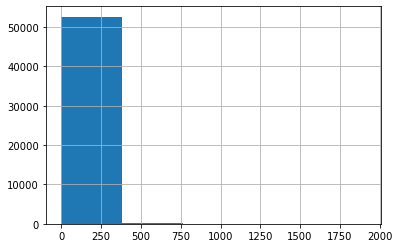

In [184]:
data['time_in_shelter'].hist(bins=5)

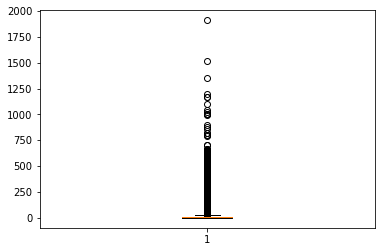

In [185]:
plt.boxplot(x=data['time_in_shelter']);

<AxesSubplot:>

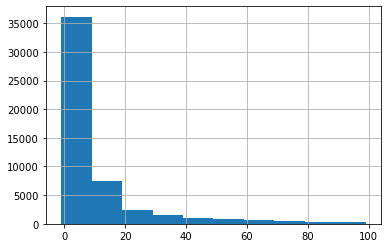

In [186]:
data[data['time_in_shelter'] < 100]['time_in_shelter'].hist()

In [187]:
data[data['time_in_shelter'] > 200].sort_values(by=['time_in_shelter'], ascending=False)[['intake_type', 'condition', 'breed', 'outcome', 'age_out', 'age', 'time_in_shelter']]

,intake_type,condition,breed,outcome,age_out,age,time_in_shelter
1881,stray,injured,pit bull,adoption,11.0,Senior,1912
19797,surrender,normal,pit bull,adoption,5.0,Adult,1521
23574,stray,normal,labrador retriever,transfer,6.0,Adult,1351
35000,surrender,normal,pit bull,adoption,11.0,Senior,1195
32610,stray,normal,boxer,adoption,13.0,Senior,1167
...,...,...,...,...,...,...,...
27097,surrender,normal,labrador retriever,adoption,8.0,Adult,202
1804,stray,normal,chihuahua,adoption,5.0,Adult,202
29521,stray,normal,boxer,adoption,10.0,Senior,201
11713,stray,injured,dachshund,adoption,2.0,Adult,201


In [188]:
data[data['time_in_shelter'] > 200].sort_values(by=['time_in_shelter'], ascending=False)[['breed']].value_counts()

breed                              
pit bull                               179
labrador retriever                      60
chihuahua                               28
american staffordshire terrier          26
australian cattle dog                   23
                                      ... 
labrador retriever/golden retriever      1
boxer/chinese shar pei                   1
boxer/american pit bull terrier          1
labrador retriever/rottweiler            1
yorkshire terrier                        1
Length: 87, dtype: int64

In [189]:
data[data['time_in_shelter'] > 200].sort_values(by=['time_in_shelter'], ascending=False)[['condition']].value_counts()

condition
normal       435
injured       52
sick          18
aged           8
other          4
behavior       1
medical        1
nursing        1
dtype: int64

These are likely incorrect exit dates due to a bad data merge or incorrectly labeled. Will explore pit bull time in shelter more closely to confirm we still see the extended time in shelter relationship. Considering the proportion of our data that is above 60 days in shelter (aveage being only 15 days), it is highly unlikely dogs will remain in the shelter for 200 days or more. Especially considering their condition upon entry is 'normal'.

In [190]:
data = data[data['time_in_shelter'] < 200].copy()

In [191]:
quick_look('intake_type')

stray            38651
surrender         8968
public_assist     4238
abandoned          246
euth_request       164
Name: intake_type, dtype: int64

Missing Values: 0


In [192]:
quick_look('condition')

normal      46093
injured      2742
sick         1646
nursing      1153
aged          318
other         101
medical        88
pregnant       63
neonatal       44
behavior       19
Name: condition, dtype: int64

Missing Values: 0


In [193]:
data.groupby('intake_type').mean()['time_in_shelter']

intake_type
abandoned        15.308943
euth_request      3.274390
public_assist    11.224162
stray            12.551215
surrender        15.095897
Name: time_in_shelter, dtype: float64

In [194]:
data['intake_type'].value_counts(normalize=True)

stray            0.739491
surrender        0.171581
public_assist    0.081084
abandoned        0.004707
euth_request     0.003138
Name: intake_type, dtype: float64

In [195]:
data.groupby(by='intake_type').mean()

,age_in,age_out,sex,intact_out,pure,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,time_in_shelter
intake_type,,,,,,,,,,,,,
abandoned,1.284553,1.321138,0.491870,0.345528,0.796748,0.676520,17.822738,30.880946,17.434601,20.380427,43.202628,57.326133,15.308943
euth_request,8.286585,8.286585,0.567073,0.402439,0.859756,0.687796,18.242021,30.306608,16.786765,19.809561,42.255958,54.903555,3.274390
public_assist,3.517933,3.541765,0.583058,0.347334,0.864323,0.632712,21.550498,35.765922,15.959425,18.741135,38.500772,50.456543,11.224162
stray,2.318258,2.345890,0.530491,0.275439,0.851983,0.636439,21.207834,35.787596,16.026343,18.941025,38.446269,51.172091,12.551215
surrender,2.675401,2.698372,0.495317,0.241414,0.801070,0.625875,22.014101,37.007499,15.658726,18.536105,37.384999,50.045452,15.095897


In [196]:
quick_look('outcome')

adoption        23731
transfer        13922
return_owner    12770
euthanasia       1522
died              263
disposal           41
missing            18
Name: outcome, dtype: int64

Missing Values: 0


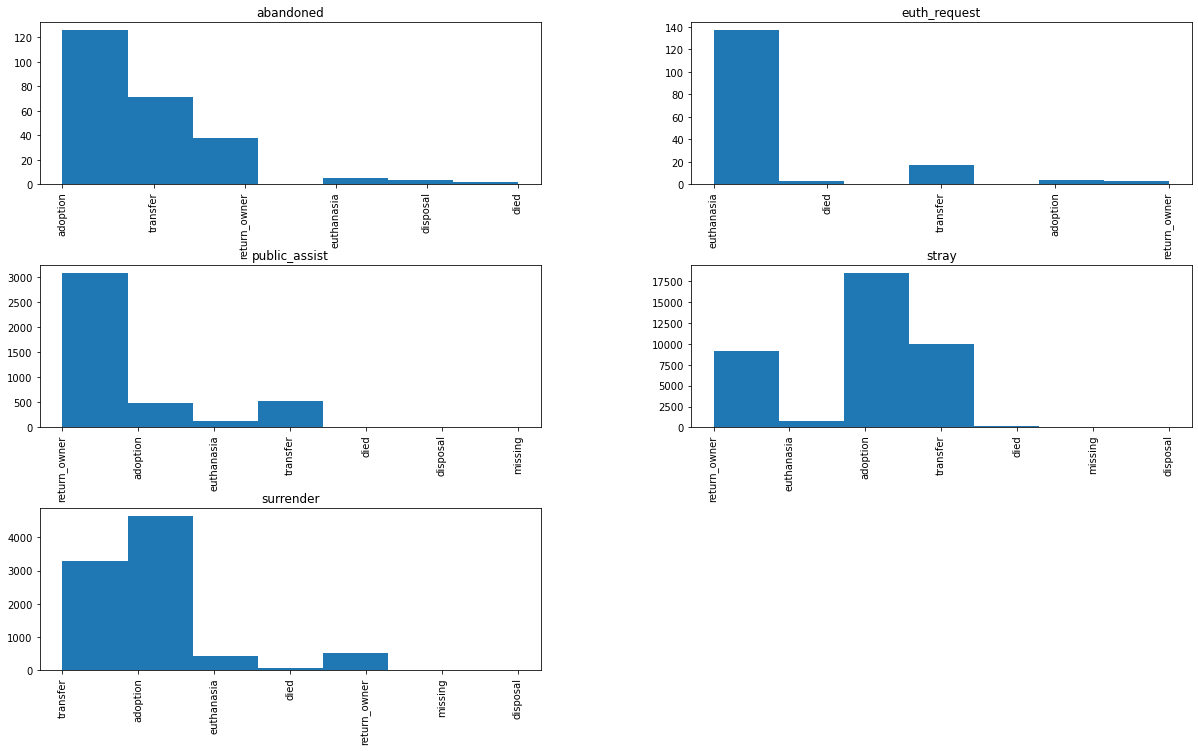

In [197]:
data['outcome'].hist(by=data['intake_type'], figsize=(20,12), bins=7);

In [198]:
data = data[data['intake_type'] != 'euth_request'].copy()

Will drop euth_requests from the set. 

In [199]:
quick_look('sex')

1    27538
0    24565
Name: sex, dtype: int64

Missing Values: 0


In [200]:
data.groupby('sex').mean()['time_in_shelter']

sex
0    12.925137
1    12.866766
Name: time_in_shelter, dtype: float64

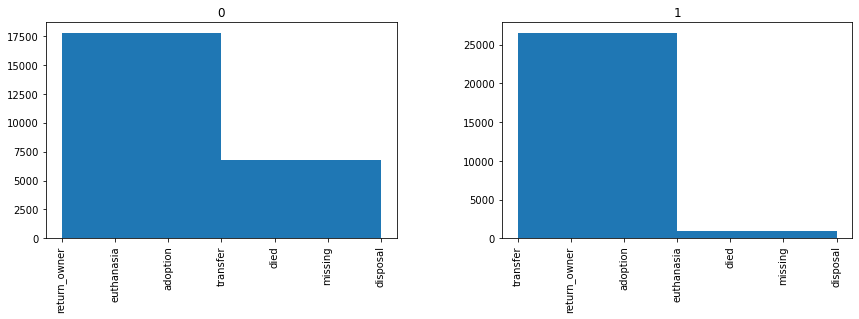

In [201]:
data['outcome'].hist(by=data['sex'], figsize=(14,4), bins=2);

In [202]:
data.groupby('age').mean()['time_in_shelter'].sort_values()

age
Senior    10.433380
Baby      10.519038
Young     13.306043
Adult     14.619034
Name: time_in_shelter, dtype: float64

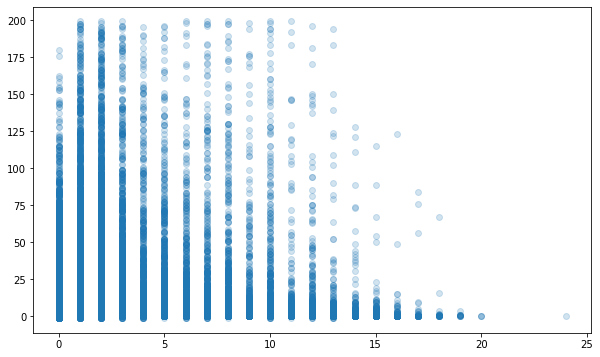

In [203]:
plt.figure(figsize=(10, 6))
plt.scatter(x=data['age_out'], y=data['time_in_shelter'], alpha=.2)

In [204]:
data.describe()

,age_in,age_out,sex,intact_out,pure,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,time_in_shelter
count,52103.000000,52103.000000,52103.00000,52103.000000,52103.000000,52103.000000,52103.000000,52103.000000,52103.000000,52103.000000,52103.000000,52103.000000,52103.000000
mean,2.472430,2.498992,0.52853,0.275761,0.843963,0.634507,21.358499,35.972637,15.964274,18.861867,38.290493,50.949027,12.894286
std,3.132238,3.144760,0.49919,0.446901,0.362894,0.260844,19.539604,29.716577,6.136882,6.518836,25.612951,32.492240,23.917792
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.100000,1.000000,4.000000,6.000000,8.000000,2.000000,5.000000,-1.000000
25%,0.000000,0.000000,0.00000,0.000000,1.000000,0.475000,1.000000,4.000000,10.000000,12.500000,16.000000,20.000000,2.000000
50%,1.000000,1.000000,1.00000,0.000000,1.000000,0.700000,16.000000,25.000000,17.000000,20.000000,40.000000,50.000000,5.000000
75%,3.000000,3.000000,1.00000,1.000000,1.000000,0.950000,33.500000,57.500000,21.000000,24.000000,55.000000,80.000000,11.000000
max,24.000000,24.000000,1.00000,1.000000,1.000000,0.950000,81.000000,100.000000,48.000000,66.000000,175.000000,190.000000,199.000000


In [205]:
data[data['time_in_shelter'] <= 1]['outcome'].value_counts(normalize=True)

return_owner    0.621964
transfer        0.260003
adoption        0.055478
euthanasia      0.051983
died            0.009261
disposal        0.001223
missing         0.000087
Name: outcome, dtype: float64

In [206]:
data[data['time_in_shelter'] <= 2]['outcome'].value_counts(normalize=True)

return_owner    0.595086
transfer        0.258567
adoption        0.089281
euthanasia      0.047154
died            0.008638
disposal        0.001062
missing         0.000212
Name: outcome, dtype: float64

In [207]:
data[data['time_in_shelter'] <= 3]['outcome'].value_counts(normalize=True)

return_owner    0.524709
transfer        0.284447
adoption        0.136707
euthanasia      0.043560
died            0.009156
disposal        0.001194
missing         0.000227
Name: outcome, dtype: float64

<AxesSubplot:>

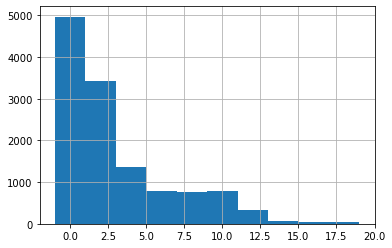

In [208]:
data[(data['outcome'] == 'return_owner') & (data['time_in_shelter'] < 20)]['time_in_shelter'].hist()

Going to exclude dogs that are returned to the owner or transfered out. A large portion happen very quickly and will add noise to the predictions.

In [209]:
data = data[data['outcome'] != 'return_owner'].copy()

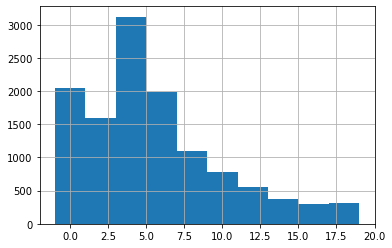

In [210]:
data[(data['outcome'] == 'transfer') & (data['time_in_shelter'] < 20)]['time_in_shelter'].hist();

In [211]:
data[data['outcome'] == 'transfer'].groupby('condition').size().sort_values()

condition
behavior        3
neonatal       27
pregnant       34
medical        40
other          41
aged           62
nursing       586
injured       857
sick          862
normal      11393
dtype: int64

Take a look at outcomes.

In [212]:
data.groupby('outcome').mean()['time_in_shelter'].sort_values()

outcome
disposal       4.000000
died           8.550000
euthanasia     9.156679
transfer      10.117584
adoption      20.071438
missing       37.666667
Name: time_in_shelter, dtype: float64

In [213]:
data.groupby('outcome').size().sort_values()

outcome
missing          18
disposal         41
died            260
euthanasia     1385
transfer      13905
adoption      23727
dtype: int64

In [214]:
data = data[~data['outcome'].isin(['missing', 'disposal', 'transfer'])].copy()

Can drop missing & disposal as they are a tiny sample size and likely only going to add noise. Dogs that are transfered are transferred quickly, typically

In [216]:
data.groupby('condition').mean()['time_in_shelter'].sort_values()

condition
normal      17.905902
sick        19.595318
aged        20.950617
medical     28.146341
injured     29.472903
other       42.324324
nursing     51.485030
neonatal    55.181818
behavior    58.555556
pregnant    59.115385
Name: time_in_shelter, dtype: float64

In [217]:
data.groupby('condition').size().sort_values()

condition
behavior        9
neonatal       11
pregnant       26
other          37
medical        41
aged           81
nursing       501
sick          598
injured      1347
normal      22721
dtype: int64

Combine pregnant & nursing along with medical, sick & injured. Will drop neonatal as the dogs are too young to be released from the shelter within a specific time period and the dogs we are attempting to classify will all be older than a couple weeks.

In [218]:
data = data[data['condition'] != 'neonatal'].copy()

In [219]:
data.loc[data['condition'] == 'pregnant', 'condition'] = 'nursing'
data.loc[data['condition'] == 'medical', 'condition'] = 'injured'
data.loc[data['condition'] == 'sick', 'condition'] = 'injured'

In [220]:
data.groupby('condition').mean()['time_in_shelter'].sort_values()

condition
normal      17.905902
aged        20.950617
injured     26.471299
other       42.324324
nursing     51.861480
behavior    58.555556
Name: time_in_shelter, dtype: float64

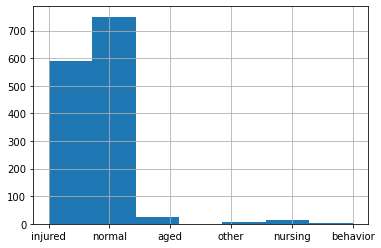

In [221]:
data[data['outcome']=='euthanasia']['condition'].hist(bins=7);

<AxesSubplot:>

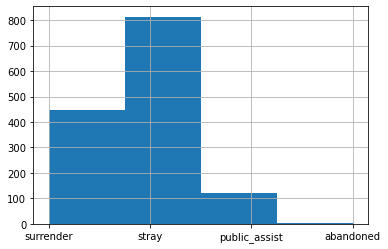

In [222]:
data[data['outcome']=='euthanasia']['intake_type'].hist(bins=4)

In [223]:
data.groupby('outcome').mean()['time_in_shelter']

outcome
adoption      20.055656
died           8.550000
euthanasia     9.140173
Name: time_in_shelter, dtype: float64

In [224]:
data.groupby('condition').size().sort_values()

condition
behavior        9
other          37
aged           81
nursing       527
injured      1986
normal      22721
dtype: int64

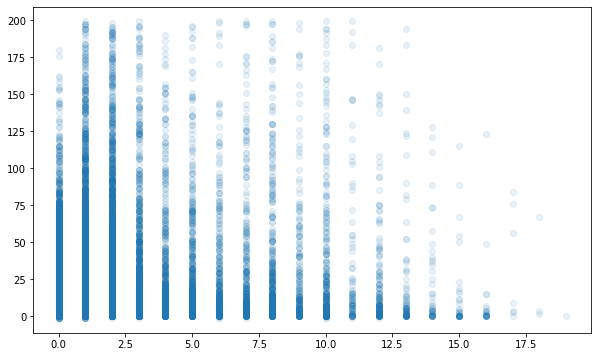

In [225]:
plt.figure(figsize=(10, 6))
plt.scatter(x=data['age_out'], y=data['time_in_shelter'], alpha=.1)

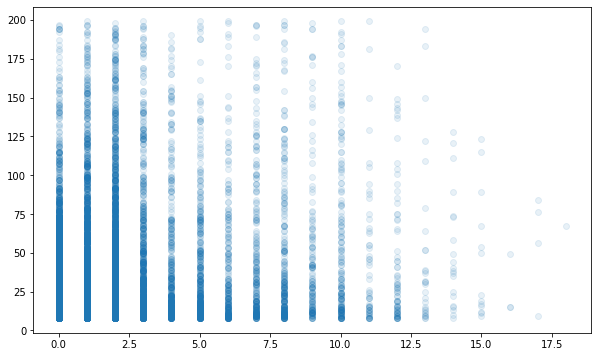

In [708]:
plt.figure(figsize=(10, 6))
plt.scatter(x=data[data['time_in_shelter'] > 7]['age_in'], y=data[data['time_in_shelter'] > 7]['time_in_shelter'], alpha=.1)


In [226]:
data.groupby('age').mean()['time_in_shelter'].sort_values()

age
Baby      14.522711
Young     17.660171
Adult     24.357340
Senior    28.926425
Name: time_in_shelter, dtype: float64

Some relationships between age and time in shelter are beginning to show.

Younger dogs get adopted sooner.

In [227]:
data.groupby('intake_type').mean()['time_in_shelter'].sort_values()

intake_type
stray            18.828522
abandoned        19.130769
surrender        20.311115
public_assist    27.478191
Name: time_in_shelter, dtype: float64

In [228]:
data.groupby('condition').mean()['time_in_shelter'].sort_values()

condition
normal      17.905902
aged        20.950617
injured     26.471299
other       42.324324
nursing     51.861480
behavior    58.555556
Name: time_in_shelter, dtype: float64

In [229]:
data.groupby('outcome').mean()['time_in_shelter'].sort_values()

outcome
died           8.550000
euthanasia     9.140173
adoption      20.055656
Name: time_in_shelter, dtype: float64

In [230]:
data['breed_1'].value_counts()[:20]

labrador retriever                4066
chihuahua                         3890
pit bull                          3102
german shepherd                   1997
australian cattle dog             1323
dachshund                          945
border collie                      610
siberian husky                     548
boxer                              481
australian shepherd                431
fox terrier                        386
great pyrenees                     381
jack russell terrier               380
miniature poodle                   379
american staffordshire terrier     354
beagle                             347
cairn terrier                      342
yorkshire terrier                  338
pointer                            331
miniature schnauzer                301
Name: breed_1, dtype: int64

In [231]:
common_breeds = list(data['breed_1'].value_counts()[:20].index)

In [232]:
data[data['breed_1'].isin(common_breeds)].groupby('pure').mean()['time_in_shelter']

pure
0.0    20.094005
1.0    20.011203
Name: time_in_shelter, dtype: float64

No relationship to pure breed vs mutt

In [233]:
data[data['breed_1'].isin(common_breeds)]

,intake_type,condition,age_in,breed,outcome,age_out,sex,intact_out,age,primary_color,...,breed_2,pure,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,time_in_shelter
7,surrender,normal,16.0,dachshund,adoption,16.0,1,0,Senior,black,...,dachshund,1.0,0.500,26.0,40.0,7.0,10.0,16.0,32.0,49
8,surrender,injured,14.0,border collie,euthanasia,14.0,1,0,Senior,black,...,border collie,1.0,0.950,1.0,4.0,19.0,21.0,40.0,40.0,0
9,public_assist,aged,17.0,chihuahua,adoption,17.0,1,0,Senior,tan,...,chihuahua,1.0,0.300,41.0,80.0,6.0,9.0,2.0,5.0,9
14,stray,injured,16.0,american staffordshire terrier,euthanasia,16.0,0,0,Senior,brown,...,american staffordshire terrier,1.0,0.700,16.0,25.0,17.0,19.0,40.0,50.0,0
16,stray,normal,15.0,labrador retriever/beagle,adoption,15.0,1,0,Senior,sable,...,beagle,0.0,0.525,41.0,52.0,17.0,20.0,36.5,55.0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53482,abandoned,normal,0.0,siberian husky,adoption,0.0,0,0,Baby,black,...,siberian husky,1.0,0.500,26.0,40.0,20.0,23.0,40.0,60.0,7
53494,abandoned,normal,0.0,australian cattle dog,adoption,0.0,0,0,Baby,brown,...,australian cattle dog,1.0,0.950,1.0,4.0,17.0,20.0,35.0,45.0,6
53495,abandoned,normal,0.0,australian cattle dog,adoption,0.0,0,0,Baby,brown,...,australian cattle dog,1.0,0.950,1.0,4.0,17.0,20.0,35.0,45.0,7
53497,abandoned,normal,0.0,pit bull,adoption,0.0,0,0,Baby,white,...,pit bull,1.0,0.700,16.0,25.0,17.0,19.0,40.0,50.0,7


In [234]:
data['breed_2'].value_counts().tail(50)

alaskan malamute                      18
finnish spitz                         17
australian terrier                    17
welsh terrier                         17
airedale terrier                      17
bernese mountain dog                  17
havanese                              15
bearded collie                        15
irish terrier                         14
bloodhound                            13
bullmastiff                           12
french bulldog                        11
nova scotia duck tolling retriever    11
american foxhound                      9
tibetan terrier                        9
brittany                               9
canaan dog                             8
beauceron                              8
german wirehaired pointer              8
english foxhound                       7
silky terrier                          6
affenpinscher                          6
ibizan hound                           6
newfoundland                           6
schipperke      

In [565]:
data['at_risk'] = np.where(data['time_in_shelter'] > 20, 1, 0)

In [688]:
data['breed_3'] = np.where(~data['breed_1'].isin(common_breeds), 'other', data['breed_1'])

In [689]:
data['breed_3'].value_counts()

other                             4429
labrador retriever                4066
chihuahua                         3890
pit bull                          3102
german shepherd                   1997
australian cattle dog             1323
dachshund                          945
border collie                      610
siberian husky                     548
boxer                              481
australian shepherd                431
fox terrier                        386
great pyrenees                     381
jack russell terrier               380
miniature poodle                   379
american staffordshire terrier     354
beagle                             347
cairn terrier                      342
yorkshire terrier                  338
pointer                            331
miniature schnauzer                301
Name: breed_3, dtype: int64

# PCA

In [566]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

In [567]:
data.columns

Index(['intake_type', 'condition', 'age_in', 'breed', 'outcome', 'age_out',
       'sex', 'intact_out', 'age', 'primary_color', 'secondary_color',
       'breed_1', 'breed_2', 'pure', 'obey', 'reps_lower', 'reps_upper',
       'height_low_inches', 'height_high_inches', 'weight_low_lbs',
       'weight_high_lbs', 'time_in_shelter', 'at_risk'],
      dtype='object')

In [568]:
data.head()

,intake_type,condition,age_in,breed,outcome,age_out,sex,intact_out,age,primary_color,...,pure,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,time_in_shelter,at_risk
7,surrender,normal,16.0,dachshund,adoption,16.0,1,0,Senior,black,...,1.0,0.50,26.0,40.0,7.0,10.0,16.0,32.0,49,1
8,surrender,injured,14.0,border collie,euthanasia,14.0,1,0,Senior,black,...,1.0,0.95,1.0,4.0,19.0,21.0,40.0,40.0,0,0
9,public_assist,aged,17.0,chihuahua,adoption,17.0,1,0,Senior,tan,...,1.0,0.30,41.0,80.0,6.0,9.0,2.0,5.0,9,0
12,surrender,injured,15.0,pug,euthanasia,15.0,1,0,Senior,gold,...,1.0,0.30,41.0,80.0,10.0,11.0,14.0,22.0,0,0
13,surrender,injured,15.0,pug,euthanasia,15.0,1,0,Senior,gold,...,1.0,0.30,41.0,80.0,10.0,11.0,14.0,22.0,0,0


In [569]:
y = data['time_in_shelter']
X = data.drop(columns=['time_in_shelter'])

In [570]:
y.head()

7     49
8      0
9      9
12     0
13     0
Name: time_in_shelter, dtype: int64

In [571]:
X.columns

Index(['intake_type', 'condition', 'age_in', 'breed', 'outcome', 'age_out',
       'sex', 'intact_out', 'age', 'primary_color', 'secondary_color',
       'breed_1', 'breed_2', 'pure', 'obey', 'reps_lower', 'reps_upper',
       'height_low_inches', 'height_high_inches', 'weight_low_lbs',
       'weight_high_lbs', 'at_risk'],
      dtype='object')

In [572]:
numeric_cols = ['age_in', 'sex', 'intact_out', 'pure', 'obey', 'reps_lower', 'reps_upper', 'height_low_inches', 'height_high_inches', 'weight_low_lbs', 'weight_high_lbs']

In [573]:
numeric_cols = ['age_in', 'obey', 'height_low_inches', 'height_high_inches', 'weight_low_lbs', 'weight_high_lbs']

In [574]:
cat_features = ['age']

In [575]:
X[cat_features]

,age
7,Senior
8,Senior
9,Senior
12,Senior
13,Senior
...,...
53495,Baby
53497,Baby
53502,Senior
53510,Adult


In [576]:
X_dum = pd.concat([
    # X[numeric_cols], 
    pd.get_dummies(X[cat_features]), 
    # pd.get_dummies(X['primary_color'], prefix='color'), 
    # pd.get_dummies(X['condition'], prefix='condition'), 
    # pd.get_dummies(X['intake_type'], prefix='intake')
    ], axis=1)

In [577]:
X_dum.head()

,age_Adult,age_Baby,age_Senior,age_Young
7,0,0,1,0
8,0,0,1,0
9,0,0,1,0
12,0,0,1,0
13,0,0,1,0


In [578]:
X_dum.shape

(25361, 4)

In [579]:
y.shape

(25361,)

In [580]:
pf = PolynomialFeatures(degree=2)
X_poly = pf.fit_transform(X_dum)

In [581]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=123)

In [582]:
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, random_state=123)

In [583]:
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [584]:
lr_params = {
    'alpha': [.05, .1, .25, .5],
}

lr = Lasso(random_state=123, max_iter=10_000)
gs_lr = GridSearchCV(lr, lr_params)

gs_lr.fit(X_train_sc, y_train)

GridSearchCV(estimator=Lasso(max_iter=10000, random_state=123),
             param_grid={'alpha': [0.05, 0.1, 0.25, 0.5]})

In [585]:
pd.DataFrame(gs_lr.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010013,0.005281,0.001034,0.000212,0.05,{'alpha': 0.05},0.023698,0.028663,0.019145,0.021535,0.022227,0.023054,0.003167,1
1,0.005805,0.001680,0.000854,0.000171,0.1,{'alpha': 0.1},0.023624,0.028479,0.019251,0.021606,0.022205,0.023033,0.003067,2
2,0.004392,0.001473,0.000875,0.000157,0.25,{'alpha': 0.25},0.023317,0.027844,0.019489,0.021733,0.022063,0.022889,0.002768,3
3,0.004437,0.001562,0.000748,0.000206,0.5,{'alpha': 0.5},0.022522,0.026516,0.019621,0.021662,0.021568,0.022378,0.002276,4


In [586]:
mean_squared_error(y_test, gs_lr.predict(X_test_sc), squared=False)

28.45460417997507

In [587]:
gs_lr.predict(X_test_sc)

array([24.37208784, 14.60229658, 18.13034482, ..., 18.13034482,
       14.60229658, 18.13034482])

Baseline in days

In [588]:
y.mean()

19.34202121367454

In [589]:
from sklearn.decomposition import PCA

In [590]:
X_dum = pd.concat([
    X[numeric_cols], 
    pd.get_dummies(X[cat_features]), 
    pd.get_dummies(X['breed_1']),
    # pd.get_dummies(X['primary_color'], prefix='color'), 
    pd.get_dummies(X['condition'], prefix='condition'), 
    # pd.get_dummies(X['intake_type'], prefix='intake')
    ], axis=1)

In [591]:
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, random_state=12)

In [638]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [639]:
pca = PCA(random_state=123, n_components=50)

In [640]:
pca.fit(X_train_sc)

PCA(n_components=50, random_state=123)

In [641]:
Z_train = pca.transform(X_train_sc)

In [642]:
Z_test = pca.transform(X_test_sc)

In [643]:
pd.DataFrame(Z_train)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.396757,-1.571892,-0.597899,-0.312293,-0.051804,1.223279,-1.056863,0.589516,1.888689,-0.459775,...,0.009441,0.005113,-0.015460,-0.001346,0.000587,0.003037,0.014856,-0.010872,0.001737,0.014936
1,-0.488398,-1.273842,-0.355147,0.437942,0.007373,0.479904,-0.441999,0.335590,-0.698599,0.178176,...,0.052690,0.116772,-0.056470,-0.056697,0.056969,0.060394,0.048087,-0.053283,-0.036540,-0.067231
2,5.038387,1.827169,2.339929,6.828796,5.399941,0.754418,3.911938,-5.949337,4.564277,9.714865,...,0.795013,0.851262,0.806124,0.676383,-0.825730,-1.328425,0.011326,-0.856536,-0.080463,0.772799
3,-0.650769,0.545187,1.671597,-0.043082,-1.958006,-0.492098,0.491025,-0.490638,0.326209,0.134292,...,0.006066,0.003751,-0.001636,-0.003019,-0.001297,0.002123,-0.004972,-0.003648,0.006067,-0.001117
4,-0.650769,0.545187,1.671597,-0.043082,-1.958006,-0.492098,0.491025,-0.490638,0.326209,0.134292,...,0.006066,0.003751,-0.001636,-0.003019,-0.001297,0.002123,-0.004972,-0.003648,0.006067,-0.001117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19015,-0.793255,-1.473304,-0.070552,-0.042808,-0.816931,-0.609025,0.114552,1.851195,0.013949,1.173759,...,-0.553674,2.073230,-0.037924,-1.986093,0.598639,-0.319117,1.592194,-0.373241,-4.780441,0.249716
19016,-0.529001,1.873588,-1.362416,0.342344,-0.401035,-0.329990,-1.329241,-1.331960,-0.005582,-0.590346,...,0.220132,-0.600329,-0.616527,0.068223,-0.236989,-0.186181,0.018351,-0.195363,0.102310,0.069935
19017,-0.294162,1.549502,-0.759911,-0.399927,0.008961,0.120457,-1.495909,0.810591,-0.841940,0.234921,...,0.048702,0.057105,-0.027066,-0.110821,-0.069672,-0.011798,-0.082238,-0.004539,0.052706,0.043408
19018,-0.650769,0.545187,1.671597,-0.043082,-1.958006,-0.492098,0.491025,-0.490638,0.326209,0.134292,...,0.006066,0.003751,-0.001636,-0.003019,-0.001297,0.002123,-0.004972,-0.003648,0.006067,-0.001117


In [644]:
np.round(pca.explained_variance_ratio_, 4)

array([0.015 , 0.013 , 0.0107, 0.0095, 0.0083, 0.0081, 0.0079, 0.0078,
       0.0077, 0.0077, 0.0076, 0.0076, 0.0076, 0.0075, 0.0075, 0.0075,
       0.0075, 0.0075, 0.0075, 0.0075, 0.0075, 0.0075, 0.0074, 0.0074,
       0.0074, 0.0074, 0.0074, 0.0074, 0.0074, 0.0074, 0.0074, 0.0074,
       0.0074, 0.0074, 0.0074, 0.0074, 0.0074, 0.0074, 0.0074, 0.0074,
       0.0074, 0.0074, 0.0074, 0.0074, 0.0074, 0.0074, 0.0074, 0.0074,
       0.0074, 0.0074])

In [645]:
# Pull the explained variance attribute.
var_exp = pca.explained_variance_ratio_
print(f'Explained variance (first 10 components): {np.round(var_exp[:10], 3)}')

print('')

# Generate the cumulative explained variance.
cum_var_exp = np.cumsum(var_exp)
print(f'Cumulative explained variance (first 10 components): {np.round(var_exp[:10], 3)}')

Explained variance (first 10 components): [0.015 0.013 0.011 0.01  0.008 0.008 0.008 0.008 0.008 0.008]

Cumulative explained variance (first 10 components): [0.015 0.013 0.011 0.01  0.008 0.008 0.008 0.008 0.008 0.008]


In [646]:
## Set up dataframe with PCs and amount of explained variance
columns = [f'PCA_{i+1}' for i in pd.DataFrame(Z_train).columns]
var_ratio_df = pd.DataFrame({
    'Variation':var_exp,
    'PC':columns
})

var_ratio_df.head()

,Variation,PC
0,0.014999,PCA_1
1,0.013041,PCA_2
2,0.010691,PCA_3
3,0.009536,PCA_4
4,0.008322,PCA_5


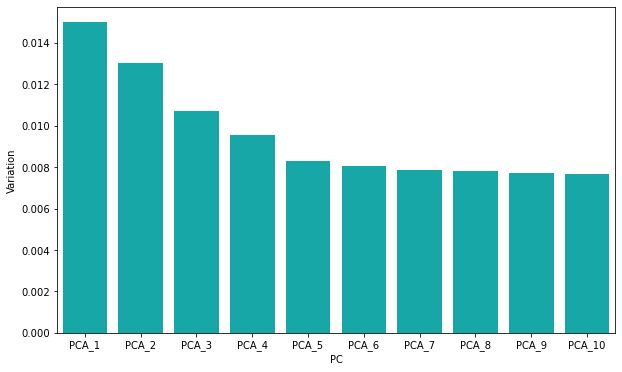

In [647]:
# Plot explained variance of each principal component
plt.figure(figsize = (10,6))
sns.barplot(x = var_ratio_df['PC'].head(10),
            y = var_ratio_df['Variation'].head(10), 
            data=var_ratio_df, color="c");

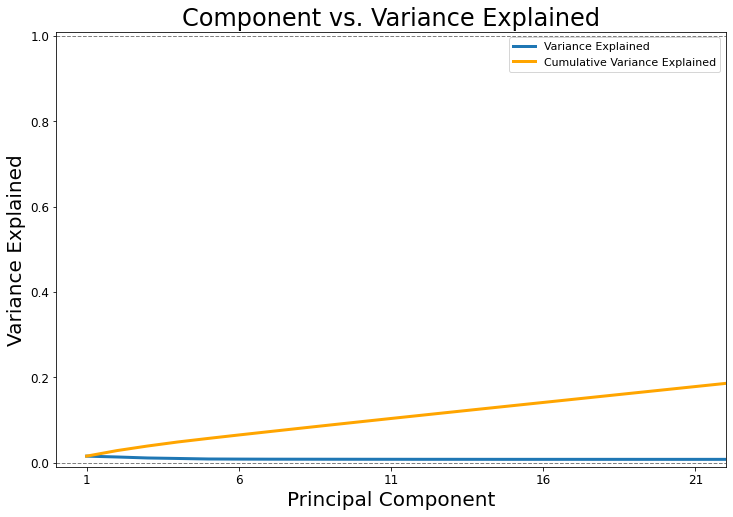

In [648]:
# Plot the variance explained (and cumulative variance explained).
plt.figure(figsize=(12,8))

# Plot the explained variance.
plt.plot(range(len(var_exp)), var_exp, lw=3, label = 'Variance Explained')

# Plot the cumulative explained variance.
plt.plot(range(len(var_exp)), cum_var_exp, lw=3, color = 'orange', label = 'Cumulative Variance Explained')

# Add horizontal lines at y=0 and y=1.
plt.axhline(y=0, linewidth=1, color='grey', ls='dashed')
plt.axhline(y=1, linewidth=1, color='grey', ls='dashed')

# Set the limits of the axes.
plt.xlim([-1,21])
plt.ylim([-0.01,1.01])

# Label the axes.
plt.ylabel('Variance Explained', fontsize=20)
plt.xlabel('Principal Component', fontsize=20)

# Make the tick labels bigger
plt.xticks(range(0, 21, 5), range(1, 22, 5), fontsize=12)
plt.yticks(fontsize=12)
    
# Add title and legend.
plt.title('Component vs. Variance Explained', fontsize=24)
plt.legend(fontsize=11);

In [603]:
pca_lr = LinearRegression().fit(Z_train, y_train)

# Score on training and testing sets.
print(f'Training Score: {round(pca_lr.score(Z_train, y_train),4)}')
print(f'Testing Score: {round(pca_lr.score(Z_test, y_test),4)}')

print(f'Training RMSE: {round(pca_lr.score(Z_train, y_train),4)}')
print(f'Testing RMSE: {round(pca_lr.score(Z_test, y_test),4)}')

Training Score: 0.0817
Testing Score: 0.0827
Training RMSE: 0.0817
Testing RMSE: 0.0827


In [604]:
mean_squared_error(y_test, pca_lr.predict(Z_test), squared=False)

27.95708378948129

In [605]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

In [606]:
rf = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=123, min_samples_split=100)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, min_samples_split=100, random_state=123)

In [607]:
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))
print(mean_squared_error(y_test, rf.predict(X_test), squared=False))

0.17087876790888967
0.15071620628034788
26.90060133086576


In [608]:
tree = DecisionTreeRegressor(max_depth=5)

In [609]:
tree.fit(X_train, y_train)
print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

0.13092297084688997
0.1229428142841249


In [652]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay

In [718]:
y = data[data['time_in_shelter'] > 7]['at_risk']
X = data[data['time_in_shelter'] > 7].drop(columns=['at_risk'])

In [738]:
numeric_cols = ['age_in', 'obey', 'height_low_inches', 'height_high_inches', 'weight_low_lbs', 'weight_high_lbs']   # 82.5
# numeric_cols = ['age_in', 'obey', 'height_low_inches', 'height_high_inches']    # no change


In [739]:
cat_features = ['age']

In [783]:
X_dum = pd.concat([
    # X[numeric_cols], 
    pd.get_dummies(X[cat_features]), 
    # pd.get_dummies(X['breed_2']),
    pd.get_dummies(X['breed_1']),
    # pd.get_dummies(X['primary_color'], prefix='color'), 
    pd.get_dummies(X['condition'], prefix='condition'), 
    # pd.get_dummies(X['intake_type'], prefix='intake')
    ], axis=1)

In [784]:
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, random_state=123, stratify=y)

In [785]:
y.value_counts(normalize=True)

1    0.540995
0    0.459005
Name: at_risk, dtype: float64

In [786]:
rfc = RandomForestClassifier(n_estimators=300, max_depth=200, random_state=123, min_samples_split=10)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=200, min_samples_split=10, n_estimators=300,
                       random_state=123)

In [787]:
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))


0.6570870214967237
0.633448275862069
